# GOAL- Perform EDA and predict if the person is prone to heart attack or not

# 1. Mounting G drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.1 Data Dictionary

age - Age of the patient

sex - Sex of the patient

cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

trtbps - Resting blood pressure (in mm Hg)

chol - Cholestoral in mg/dl fetched via BMI sensor

fbs - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

restecg - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

thalachh - Maximum heart rate achieved

oldpeak - Previous peak

slp - Slope

caa - Number of major vessels

thall - Thalium Stress Test result ~ (0,3)

exng - Exercise induced angina ~ 1 = Yes, 0 = No

output - Target variable

# 2. Reading Data

In [ ]:
import pandas as pd

In [ ]:
ori_data  = pd.read_csv("/content/drive/MyDrive/Kaggle-Heart/heart.csv")
data=ori_data

In [ ]:
ori_data.head(1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


# 3. Understanding Data

## Data Shape

In [ ]:
data.shape

(303, 14)

## Checking for NULL values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Chacking for Unique Valued

In [ ]:
dict={}
for i in list(data.columns):
  dict[i]=data[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


Should i make age range?

## Separating Categorical and continnuous cariables

In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col=["output"]
print("categorical columns: ", cat_cols)
print("continuous columns: ", con_cols)
print("target variable: ", target_col)



categorical columns:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
continuous columns:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
target variable:  ['output']


# 4. Exploratory Data Analysis 

## 4.1 Categorical Variables

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


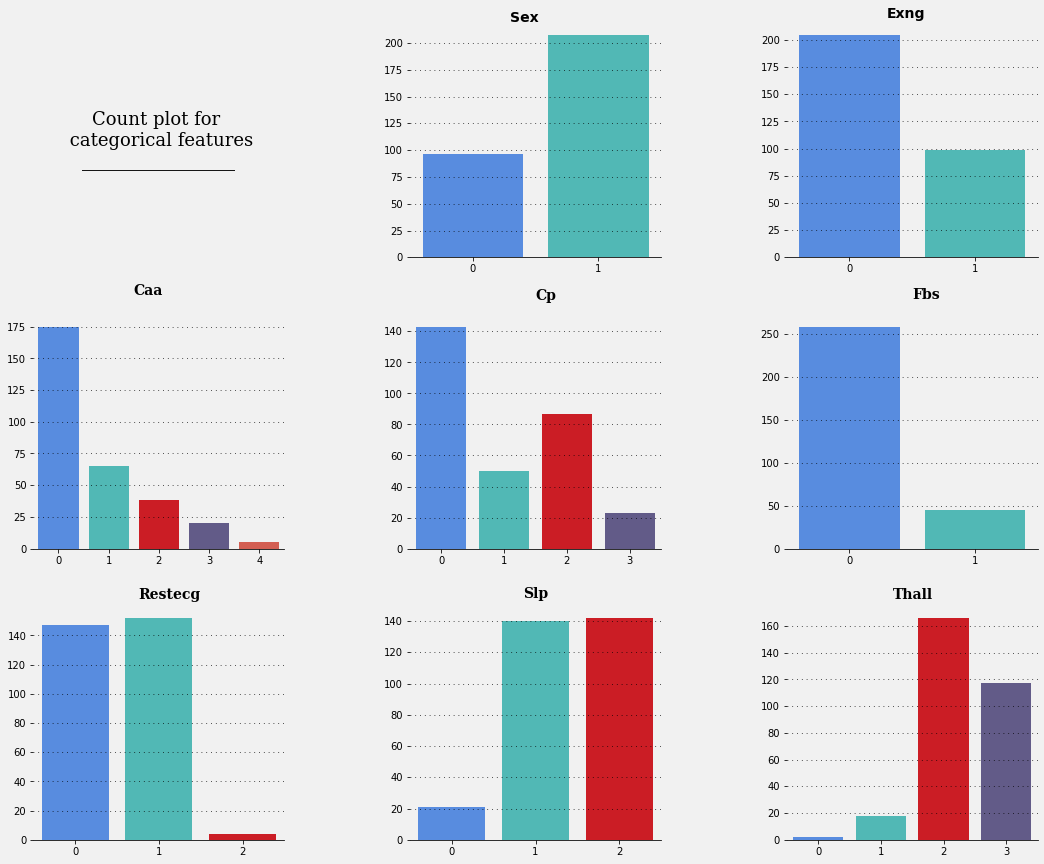

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

fig=plt.figure(figsize=(18,15))
gs=fig.add_gridspec(3,3) #The number of rows and number of columns of the grid need to be set
gs.update(wspace=.5,hspace=.25) #space between graphs

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[1,2])
ax6=fig.add_subplot(gs[2,0])
ax7=fig.add_subplot(gs[2,1])
ax8=fig.add_subplot(gs[2,2])

background_color='#F1F1F1'
color_palette = ['#4287f5','#40C9C5','#E8000B','#5D5390','#E84C3D','#23B574']

fig.patch.set_facecolor(background_color) #axis' color... same as background.. to hide
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

#Plot Title
ax0.spines["bottom"].set_visible(False)#making the bottom of graph disappear
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_xticks([])
ax0.set_yticklabels([])
ax0.set_yticks([])

ax0.text(0.5,0.5,
         'Count plot for \n categorical features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18,
         fontfamily='serif',
         color="#000000")

#Sex
ax1.text(0.3, 220, 'Sex', fontsize=14, fontweight='bold',fontfamily='arial',color='#000000')
ax1.grid(color='#000000',linestyle=":",axis='y',zorder=0, dashes=(1,5)) #zordor, hight amount is closer to the axis
sns.countplot(ax=ax1, data=data, x='sex',palette=color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")

#exng
ax2.text(.3, 220, 'Exng', fontsize=14, fontweight='bold',fontfamily='arial',color='#000000')
ax2.grid(color='#000000',linestyle=":",axis='y',zorder=0, dashes=(1,5)) #zordor, hight amount is closer to the axis
sns.countplot(ax=ax2, data=data, x='exng',palette=color_palette)
ax2.set_xlabel("")
ax2.set_ylabel("")

#caa
ax3.text(1.5, 200, 'Caa', fontsize=14, fontweight='bold',fontfamily='serif',color='#000000')
ax3.grid(color='#000000',linestyle=":",axis='y',zorder=0, dashes=(1,5)) #zordor, hight amount is closer to the axis
sns.countplot(ax=ax3, data=data, x='caa',palette=color_palette)
ax3.set_xlabel("")
ax3.set_ylabel("")

#cp
ax4.text(1.5, 160, 'Cp', fontsize=14, fontweight='bold',fontfamily='serif',color='#000000')
ax4.grid(color='#000000',linestyle=":",axis='y',zorder=0, dashes=(1,5)) #zordor, hight amount is closer to the axis
sns.countplot(ax=ax4, data=data, x='cp',palette=color_palette)
ax4.set_xlabel("")
ax4.set_ylabel("")

#fbs
ax5.text(0.5, 290, 'Fbs', fontsize=14, fontweight='bold',fontfamily='serif',color='#000000')
ax5.grid(color='#000000',linestyle=":",axis='y',zorder=0, dashes=(1,5)) #zordor, hight amount is closer to the axis
sns.countplot(ax=ax5, data=data, x='fbs',palette=color_palette)
ax5.set_xlabel("")
ax5.set_ylabel("")

#restecg
ax6.text(0.75, 165, 'Restecg', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=data,x='restecg',palette=color_palette)
ax6.set_xlabel("")
ax6.set_ylabel("")
#slp
ax7.text(0.85, 155, 'Slp', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=data,x='slp',palette=color_palette)
ax7.set_xlabel("")
ax7.set_ylabel("")

#thall
ax8.text(1.2, 180, 'Thall', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=data,x='thall',palette=color_palette)
ax8.set_xlabel("")
ax8.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)#removes axis lines  

## 4.2 - Continuous Variables

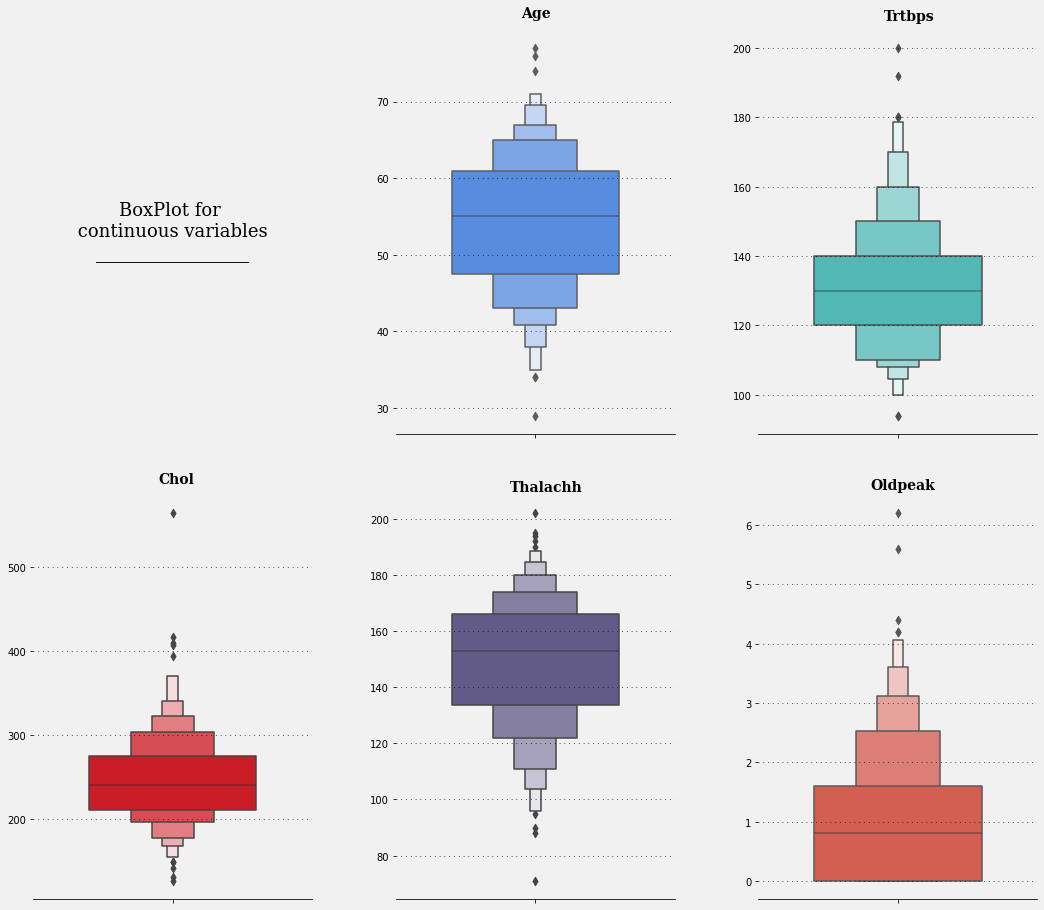

In [ ]:
fig = plt.figure(figsize=(18,16))
gs= fig.add_gridspec(2,3)
gs.update(wspace=.3, hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])
ax3=fig.add_subplot(gs[1,0])
ax4=fig.add_subplot(gs[1,1])
ax5=fig.add_subplot(gs[1,2])

background_color="#f1f1f1"
color_palette = ['#4287f5','#40C9C5','#E8000B','#5D5390','#E84C3D','#23B574']

fig.patch.set_facecolor(background_color) #axis' color... same as background.. to hide
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 

#plot title
ax0.spines["bottom"].set_visible(False)#making the bottom of graph disappear
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_xticks([])
ax0.set_yticklabels([])
ax0.set_yticks([])

ax0.text(0.5,0.5,
         'BoxPlot for \n continuous variables \n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18,
         fontfamily='serif',
         color="#000000")




# Age
ax1.text(-0.05, 81, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=data['age'],palette=['#4287f5'],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")


#Trtbps

ax2.text(-0.05, 208, 'Trtbps', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=data['trtbps'],palette=['#40C9C5'],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

#Chol
ax3.text(-0.05, 600, 'Chol', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=data['chol'],palette=['#E8000B'],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

#Thalachh
ax4.text(-0.09, 210, 'Thalachh', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=data['thalachh'],palette=["#5D5390"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

#oldpeak
ax5.text(-0.1, 6.6, 'Oldpeak', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=data['oldpeak'],palette=["#E84C3D"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)

In [ ]:
#https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy

## 4.3- Output/target CountPlot

[Text(0, 0, 'Low Chances of Heart Attack(0)'),
 Text(0, 0, 'High chances of heart attack(1)')]

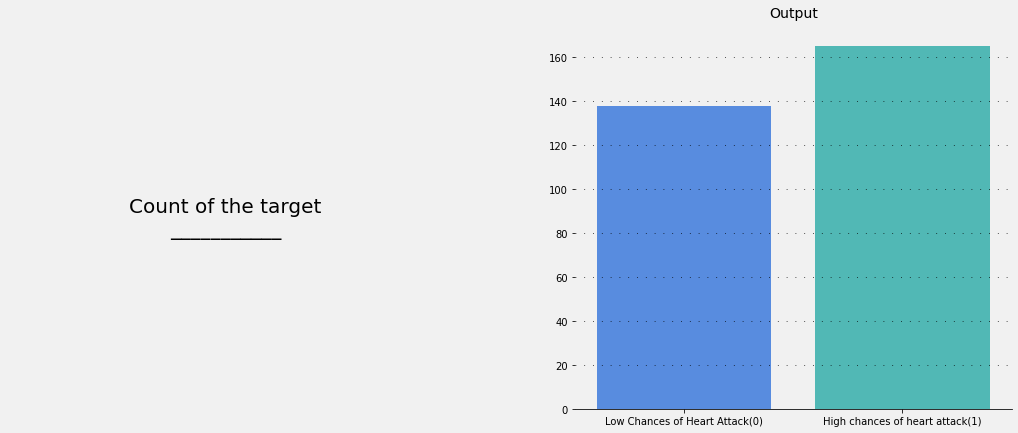

In [ ]:
fig = plt.figure(figsize=(18,7))
gs=fig.add_gridspec(1,2)
gs.update(wspace=0.3,hspace=0.15)
ax0=fig.add_subplot(gs[0,0])
ax1= fig.add_subplot(gs[0,1])

background_color="#f1f1f1"
color_palette = ['#4287f5','#40C9C5','#E8000B','#5D5390','#E84C3D','#23B574']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

#Title
ax0.text(0.5,0.5,"Count of the target\n___________",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=20,
         color='#000000')
ax0.set_xticklabels([])
ax0.set_yticklabels([])

#Target Count
ax1.text(0.5,180,"Output",
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=14,
         color='#000000')
#content:
sns.countplot(ax=ax1,data=data,x='output',palette=color_palette)
#gridline
ax1.grid(color="#000000",linestyle=':',axis='y', zorder=0, dashes=(1,10))
#labels
ax1.set_xlabel("")
ax1.set_ylabel("")
#adding label at bottom 
ax1.set_xticklabels(["Low Chances of Heart Attack(0)","High chances of heart attack(1)"])

# 5. Bivariate Analysis 

## 5.1 Correlation PLots - numbers

#### A) Number table

In [ ]:
#for continuous variables
data_corr=data[con_cols].corr().transpose()
data_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


#### B) Color coded table

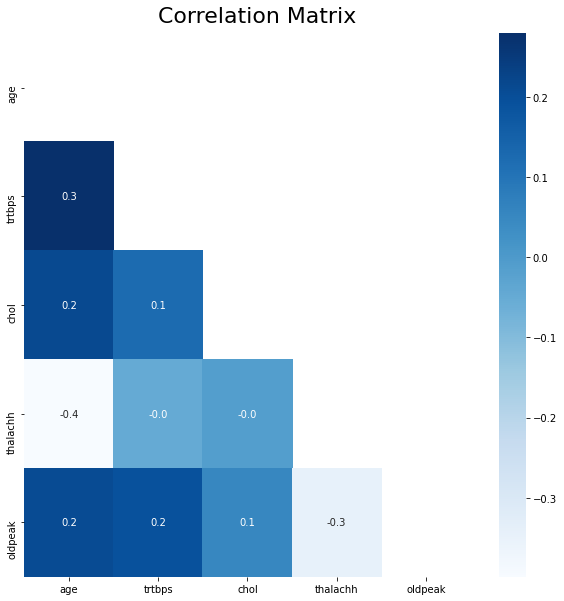

In [ ]:
import numpy as np 

fig = plt.figure(figsize=(10,10))
gs=fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0=fig.add_subplot(gs[0,0])

#color_palette=['#5D5390','#E84C3D']
mask=np.triu(np.ones_like(data_corr)) #triu - upper triangle of array
ax0.text(1.5, -0.1, "Correlation Matrix", fontsize=22, color="#000000")

data_corr=data[con_cols].corr().transpose()
sns.heatmap(data_corr, mask=mask, fmt="0.1f", annot=True, cmap='Blues')
plt.show()

#### Scatter heatmap

<Figure size 864x864 with 0 Axes>

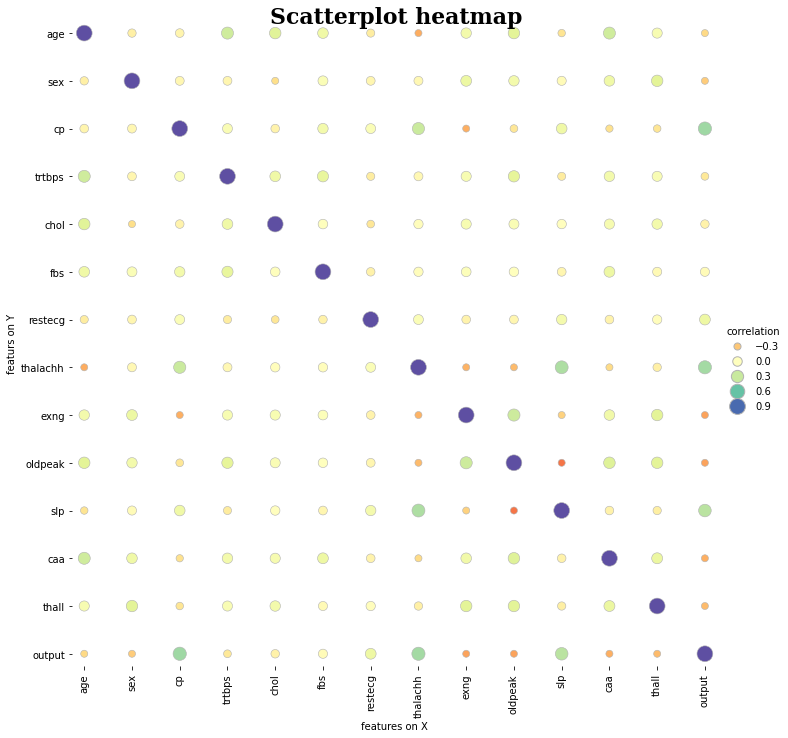

In [ ]:
#Scatterplot heatmap of dataframes

fig = plt.figure(figsize=(12,12))
corr_mat = data.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="Spectral", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()


In [ ]:
# https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy

## 5.2- Distribution of features according to target variable

#### A) Continuous features

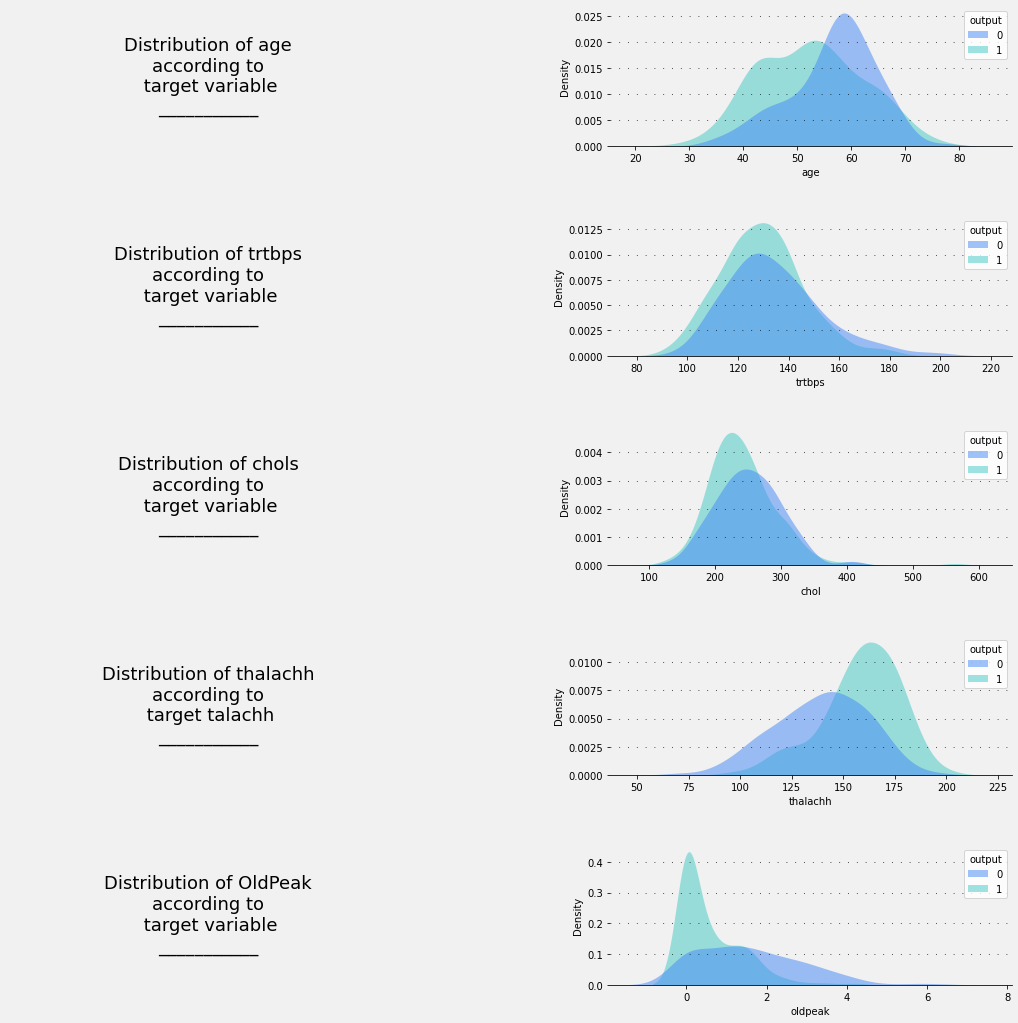

In [ ]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace = 0.5)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[2,0])
ax5=fig.add_subplot(gs[2,1])
ax6=fig.add_subplot(gs[3,0])
ax7=fig.add_subplot(gs[3,1])
ax8=fig.add_subplot(gs[4,0])
ax9=fig.add_subplot(gs[4,1])

background_color="#f1f1f1"
color_palette = ['#4287f5','#40C9C5','#E8000B','#5D5390','#E84C3D','#23B574']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

#age Title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

#TrTbps Title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

#Chol Title
ax4.text(0.5,0.5,"Distribution of chols\naccording to\n target variable\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

#Thalachh Title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target talachh\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

#OldPeak Title
ax8.text(0.5,0.5,"Distribution of OldPeak\naccording to\n target variable\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)


#Age Data
sns.kdeplot(ax=ax1,data=data,x='age',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax1.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax1.set_label("")
ax1.set_label("")

#trtbps Data
sns.kdeplot(ax=ax3,data=data,x='trtbps',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax3.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax3.set_label("")
ax3.set_label("")

#chols Data
sns.kdeplot(ax=ax5,data=data,x='chol',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax5.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax5.set_label("")
ax5.set_label("")

#talachh Data
sns.kdeplot(ax=ax7,data=data,x='thalachh',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax7.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax7.set_label("")
ax7.set_label("")

#oldPeak Data
sns.kdeplot(ax=ax9,data=data,x='oldpeak',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax9.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax9.set_label("")
ax9.set_label("")

#### B) Catigorical Features

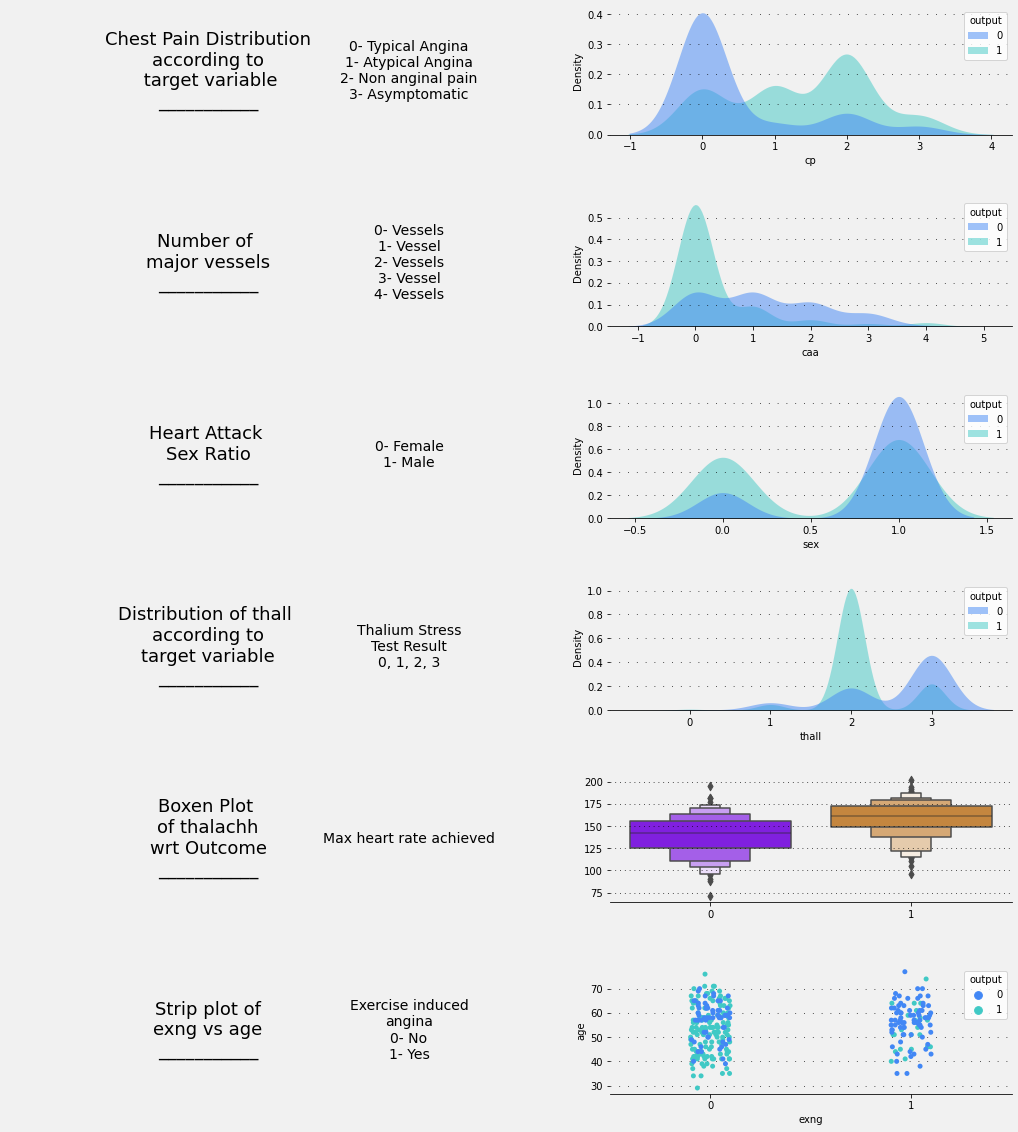

In [ ]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace = 0.5)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[1,0])
ax3=fig.add_subplot(gs[1,1])
ax4=fig.add_subplot(gs[2,0])
ax5=fig.add_subplot(gs[2,1])
ax6=fig.add_subplot(gs[3,0])
ax7=fig.add_subplot(gs[3,1])
ax8=fig.add_subplot(gs[4,0])
ax9=fig.add_subplot(gs[4,1])
ax10=fig.add_subplot(gs[5,0])
ax11=fig.add_subplot(gs[5,1])

background_color="#f1f1f1"
color_palette = ['#4287f5','#40C9C5','#E8000B','#5D5390','#E84C3D','#23B574']
fig.patch.set_facecolor(background_color)
ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

#ChestPain Title
ax0.text(0.5,0.5,"Chest Pain Distribution\naccording to\n target variable\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,0.5,"0- Typical Angina\n1- Atypical Angina\n2- Non anginal pain\n3- Asymptomatic",
         horizontalalignment = 'center',
         verticalalignment='center',
         fontsize=14)

#Chestpain data
sns.kdeplot(ax=ax1,data=data,x='cp',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax1.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax1.set_label("")
ax1.set_label("")


# Number of major vessels Title
ax2.text(0.5,0.5,"Number of \nmajor vessels\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)
ax2.text(1,0.5,"0- Vessels\n1- Vessel\n2- Vessels\n3- Vessel\n4- Vessels",
         horizontalalignment = 'center',
         verticalalignment='center',
         fontsize=14)


#Major Vessel data
sns.kdeplot(ax=ax3,data=data,x='caa',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax3.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax3.set_label("")
ax3.set_label("")


#Heart attack to sex ratio Title
ax4.text(0.5,0.5,"Heart Attack \nSex Ratio\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)
ax4.text(1,0.5,"0- Female\n1- Male",
         horizontalalignment = 'center',
         verticalalignment='center',
         fontsize=14)

#Heart attack to sex ratio data 
sns.kdeplot(ax=ax5,data=data,x='sex',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax5.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax5.set_label("")
ax5.set_label("")



#Distribution of thall according to target variable Title
ax6.text(0.5,0.5,"Distribution of thall \naccording to\ntarget variable\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)
ax6.text(1,0.5,"Thalium Stress\nTest Result\n0, 1, 2, 3",
         horizontalalignment = 'center',
         verticalalignment='center',
         fontsize=14)

#thall boxen data
sns.kdeplot(ax=ax7,data=data,x='thall',hue="output",fill=True, palette=('#4287f5','#40C9C5'), alpha = 0.5, linewidth=0)
ax7.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax7.set_label("")
ax7.set_label("")



#Boxen plot of thalachh wrt outcome Title
ax8.text(0.5,0.5,"Boxen Plot \nof thalachh\nwrt Outcome\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)
ax8.text(1,0.5,"Max heart rate achieved",
         horizontalalignment = 'center',
         verticalalignment='center',
         fontsize=14)

#thalachh boxenplot data
sns.boxenplot(ax=ax9, data=data,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax9.set_xlabel("")
ax9.set_ylabel("")


#Strip plot of exng vs age
ax10.text(0.5,0.5,"Strip plot of\nexng vs age\n___________",
         horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        color="#000000")
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)
ax10.text(1,0.5,"Exercise induced\nangina\n0- No\n1- Yes",
         horizontalalignment = 'center',
         verticalalignment='center',
         fontsize=14)


#exng v age data
sns.stripplot(ax=ax11,data=data,x='exng',y='age',hue="output",palette=('#4287f5','#40C9C5'))
ax11.grid(color='#000000',linestyle=':',axis='y', zorder = 0, dashes=(1,10))
ax11.set_label("")
ax11.set_label("")

# 6. Data Preprocessing

## 6.1- EDA Analysis Conclusion 

1. Some outliers in countinous features
2. more data for sex = 1 as compared to the other sex 
3. No real correlation 
4. Some correlation between ouput and cp, thalachh and slp
5. Older perople does not necessarily have the heart attack. People at 51 age has most
6. According to the distribution plot of thalachh wrt output, people with higher maximum heart rate achieved have higher chances of heart attack.
7. According to the distribution plot of oldpeak wrt output, people with lower pevious peak achieved have higher chances of heart attack.
8. The plot 3.2.4 tells about the following -

  i) People with Non-Anginal chest pain, that is with cp = 2 have higher chances of heart attack.

  ii) People with 0 major vessels, that is with caa = 0 have high chance of heart attack.

  iii) People with sex = 1 have higher chance of heart attack.

  iv) People with thall = 2 have much higher chance of heart attack.

  v) People with no exercise induced angina, that is with exng = 0, have higher chance of heart attack.


## 6.2- Making features model ready

In [ ]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

#creating copy
data1=data

# encoding the categorical columns
data1 = pd.get_dummies(data1, columns = cat_cols, drop_first = True) # drop_first=True is important to use, as it helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables.

#defining features and target
X=data1.drop(['output'],axis=1) #data without the output
y=data1[['output']]

#instantiating scalar
scaler=RobustScaler()

#scaling the continous features 
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,caa_4,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


## 6.3 Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =42)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 22)
The shape of X_test is        (61, 22)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


# 7. Modelling

In [ ]:
# https://www.kaggle.com/namanmanchanda/heart-attack-eda-prediction-90-accuracy

## 7.1.1 SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve

#instantiating the object and fitting
clf=SVC(kernel='linear',C=1,random_state=42).fit(X_train,y_train)

#predicting test accuracy
y_pred = clf.predict(X_test)

#printing 
print("SVM accuracy: ", accuracy_score(y_test,y_pred))

SVM accuracy:  0.8688524590163934


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 7.1.2 Hyperparameter tuning SVC

In [ ]:
#instantiating objecy
svm=SVC()

#setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001, 0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

#instantiating GridSearchCV object
from sklearn.model_selection import GridSearchCV
searcher = GridSearchCV(svm, parameters)

#fitting the object
searcher.fit(X_train, y_train)

#scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

#predicting values
y_pred = searcher.predict(X_test)

#printing test accuracy
print("\n--------------------------\nSVM test accuracy score after hyper-parameter tuning: ", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

The best params are : {'C': 3, 'gamma': 0.1}
The best score is   : 0.8384353741496599

--------------------------
SVM test accuracy score after hyper-parameter tuning:  0.9016393442622951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

## 7.2 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#instantiating object
logreg=LogisticRegression()

#fitting object
logreg.fit(X_train, y_train)

#calculating probabilities
y_pred_proba=logreg.predict_proba(X_test)

#finding the predicted values
y_pred = np.argmax(y_pred_proba, axis=1)

#printing test accuracy
print("Logistic Regression test accuracy score: ", accuracy_score(y_test, y_pred))



Logistic Regression test accuracy score:  0.9016393442622951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


why not hyper param for log reg

## 7.3 ROC Curve

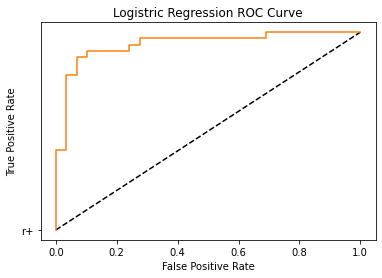

In [ ]:
# calculating the probabilities
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

## 7.4 Tree Methods

### 7.4.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#instantiating
dt=DecisionTreeClassifier(random_state=42)

#fitting model
dt.fit(X_train,y_train)

#calculatign predictions
y_pred=dt.predict(X_test)

#printing the test accuracy
print("Decision Tree Test accuracy: ", accuracy_score(y_test,y_pred))

Decision Tree Test accuracy:  0.7868852459016393


### 7.4.2 Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#instantiate 
rf=RandomForestClassifier()

#fitting model
rf.fit(X_train,y_train)

#calculating predictions
y_pred=rf.predict(X_test)

#printing accuracy
print("Random Forrest accuracy: ", accuracy_score(y_test,y_pred))


Random Forrest accuracy:  0.819672131147541


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


### 7.4.3 Gradient Boosting- without tuning

In [ ]:
#import
from sklearn.ensemble import GradientBoostingClassifier

#instantiate
gb=GradientBoostingClassifier()

#fit
gb.fit(X_train,y_train)

#calculating prediction
y_pred=gb.predict(X_test)

#print accuracy
print("Gradient Boosting Accuracy: ", accuracy_score(y_test,y_pred))

Gradient Boosting Accuracy:  0.7540983606557377


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
